
# Project: Investigate a Dataset (TMDB data set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset** : Investigating tmdb movies data set answering these questions below
>
## Questions :
1- Top 10 most popular movies
2- Top 10 movies with the highest budget
3- which year has the most number of movies released
4- Top 5 years by budget totals
5- Top 10 movies with the highest profits
6- Top 10 Movies with the highest runtime
7- Top 10 directors with a movie to their name
8- What're the factors affecting profits


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,01/01/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/02/1966,22,5.4,1966,0.000000e+00,0.000000e+00


### Data Cleaning
1- checking and removing duplicates
2- dropping unwanted columns
3- filling and filtering the dataset


In [4]:
sum(df.duplicated()) #check for duplicates
df.drop_duplicates(inplace=True) #dropped duplicates
sum(df.duplicated())
df.drop(['production_companies', 'release_date', 'imdb_id', 'cast', 'homepage', 'overview', 'tagline', 'id'], axis = 1, inplace = True)
#dropped following columns as they had no use in my questions or served no purpose in the analysis process

In [5]:
df.info() #checking data again
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   director        10821 non-null  object 
 5   keywords        9372 non-null   object 
 6   runtime         10865 non-null  int64  
 7   genres          10842 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      10865 non-null  float64
 12  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


,popularity,budget,revenue,original_title,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,22,5.4,1966,0.000000e+00,0.000000e+00


In [6]:
df['keywords'].fillna("No keywords", inplace = True) #filling missing values according to data type
df['director'].fillna("Unknown", inplace = True)
df['genres'].fillna("unspecified", inplace= True)
df_filtered_index = df[ (df['budget_adj'] <= 0) | (df['revenue_adj'] <= 0) ].index
df.drop(df_filtered_index, inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   budget          3854 non-null   int64  
 2   revenue         3854 non-null   int64  
 3   original_title  3854 non-null   object 
 4   director        3854 non-null   object 
 5   keywords        3854 non-null   object 
 6   runtime         3854 non-null   int64  
 7   genres          3854 non-null   object 
 8   vote_count      3854 non-null   int64  
 9   vote_average    3854 non-null   float64
 10  release_year    3854 non-null   int64  
 11  budget_adj      3854 non-null   float64
 12  revenue_adj     3854 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Top 10 most popular movies)

In [8]:
sort_pop = pd.DataFrame(df['popularity'].sort_values(ascending = False).head(10)) #sorting popularity listing top 10 highest values
sort_pop['original_title'] = df['original_title']
sort_pop['release_year'] = df['release_year']
sort_pop


,popularity,original_title,release_year
0,32.985763,Jurassic World,2015
1,28.419936,Mad Max: Fury Road,2015
629,24.949134,Interstellar,2014
630,14.311205,Guardians of the Galaxy,2014
2,13.112507,Insurgent,2015
631,12.971027,Captain America: The Winter Soldier,2014
1329,12.037933,Star Wars,1977
632,11.422751,John Wick,2014
3,11.173104,Star Wars: The Force Awakens,2015
633,10.739009,The Hunger Games: Mockingjay - Part 1,2014


Text(0, 0.5, 'Movies')

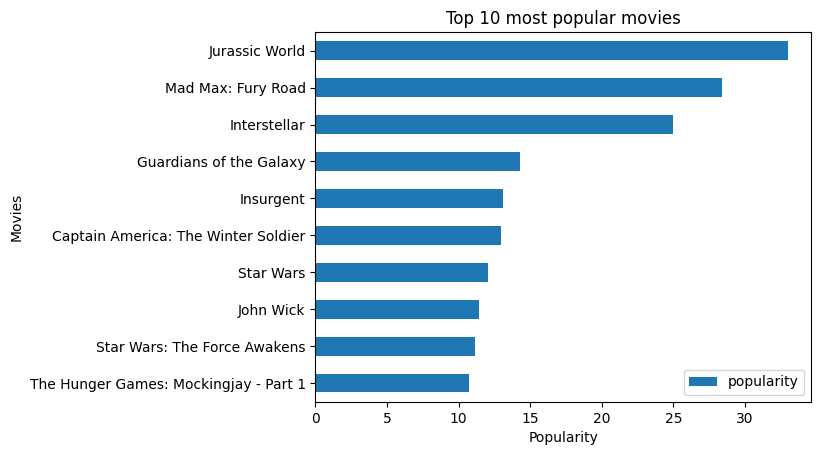

In [9]:
sort_pop.plot(x="original_title", y="popularity", kind= "barh").invert_yaxis() #plot detailing the top 10 most popular movies
plt.title("Top 10 most popular movies",fontsize = 12)
plt.xlabel('Popularity',fontsize = 10)
plt.ylabel('Movies',fontsize = 10)


### Research Question 2  (Top 10 movies with the highest budget)

Text(0, 0.5, 'Movies')

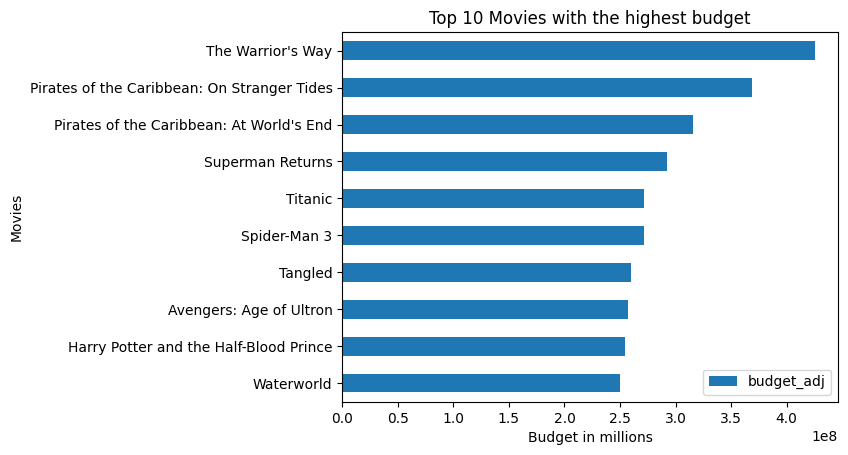

In [10]:
highbudget = pd.DataFrame(df['budget_adj'].sort_values(ascending = False).head(10)) #plot detailing movies with the highest budget
highbudget['original_title'] = df['original_title']
highbudget.plot(x="original_title", y="budget_adj", kind= "barh").invert_yaxis()
plt.title("Top 10 Movies with the highest budget",fontsize = 12)
plt.xlabel('Budget in millions',fontsize = 10)
plt.ylabel('Movies',fontsize = 10)

### Research Question 3  (which year has the most number of movies released)

release_year
2011    199
2013    180
2010    178
2009    174
2006    169
2008    167
2007    165
2014    165
2005    163
2015    160
2012    158
2004    147
2002    127
2003    121
2001    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     57
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1974     13
1971     13
1967     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1966      5
1965      5
1960      5
1969      4
Name: original_title, dtype: int64


Text(0, 0.5, 'Number Of Movies')

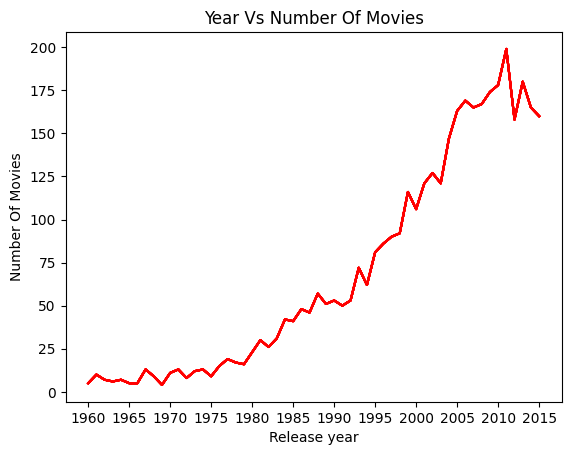

In [11]:
countdf= df.groupby('release_year').count()['original_title'].sort_values(ascending = False) #grouping by release year and counting
print(countdf)
df.groupby('release_year').count().plot(xticks = np.arange(1960,2016,5),legend = None,color= "red")
plt.title("Year Vs Number Of Movies",fontsize = 12)
plt.xlabel('Release year',fontsize = 10)
plt.ylabel('Number Of Movies',fontsize = 10)

### Research Question 4  (Top 5 years by budget totals)

    release_year  budget_adj
53          2013  8019861484
51          2011  8183222572
50          2010  8463138439
49          2009  7661451569
44          2004  7692299790


<Axes: xlabel='release_year'>

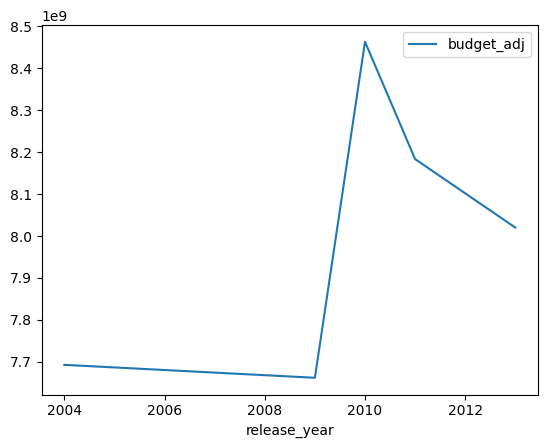

In [12]:
pd.options.display.float_format = '{:.0f}'.format #displays budget as whole number
highbudget_byyear = df[['release_year','budget_adj']] #new df for budget and year
highbudget_byyear = highbudget_byyear.pivot_table('budget_adj', ['release_year'], aggfunc='sum').reset_index().sort_values(['budget_adj'], ascending = [False]).head(5) #using pivot table to sum the budgets of the years
highbudget_byyear = highbudget_byyear.sort_values(['release_year'],ascending=False)
print(highbudget_byyear)
highbudget_byyear.plot(x="release_year", y="budget_adj", kind= "line")


### Research Question 5  (Top 10 movies with the highest profits)

In [13]:
df['profit_adj'] = df['revenue_adj'] - df['budget_adj'] #adding a profit column

,profit_adj,original_title
1329,2750136651,Star Wars
1386,2586236847,Avatar
5231,2234713671,Titanic
10594,2128035624,The Exorcist
9806,1878643094,Jaws
8889,1767968064,E.T. the Extra-Terrestrial
3,1718723211,Star Wars: The Force Awakens
8094,1551568265,The Net
10110,1545635295,One Hundred and One Dalmatians
7309,1376997526,The Empire Strikes Back


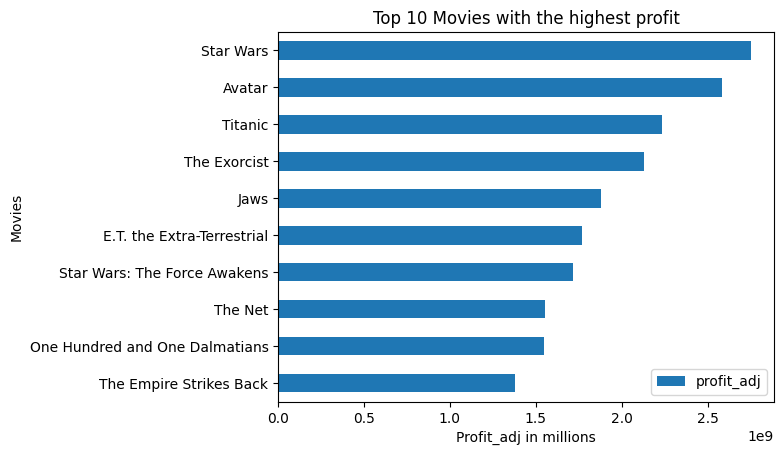

In [14]:
highprofit = pd.DataFrame(df['profit_adj'].sort_values(ascending = False).head(10)) #sorting profit column in a data frame
highprofit['original_title'] = df['original_title'] #adding titles
highprofit.plot(x="original_title", y="profit_adj", kind= "barh").invert_yaxis()
plt.title("Top 10 Movies with the highest profit",fontsize = 12)
plt.xlabel('Profit_adj in millions',fontsize = 10)
plt.ylabel('Movies',fontsize = 10)
highprofit

### Research Question 6  (Top 10 Movies with the highest runtime)


Text(0, 0.5, 'Movies')

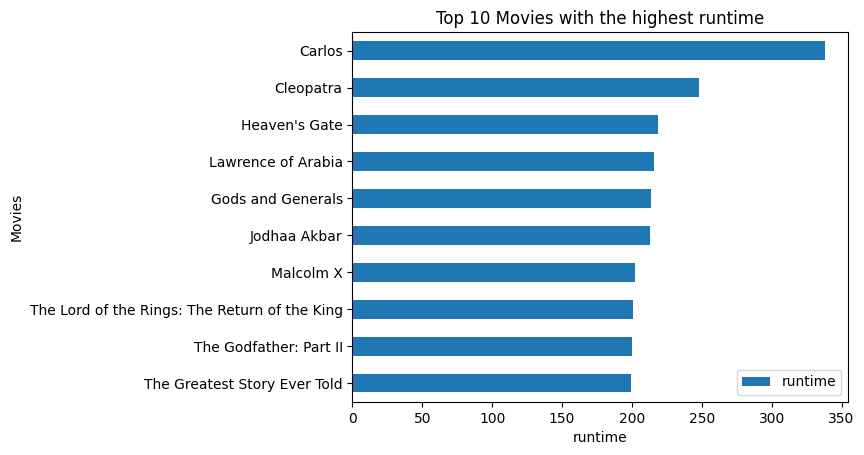

In [15]:
high_runtime = pd.DataFrame(df['runtime'].sort_values(ascending = False).head(10)) #sorting profit column in a data frame
high_runtime['original_title'] = df['original_title'] #adding titles
high_runtime.plot(x="original_title", y="runtime", kind= "barh").invert_yaxis()
plt.title("Top 10 Movies with the highest runtime",fontsize = 12)
plt.xlabel('runtime',fontsize = 10)
plt.ylabel('Movies',fontsize = 10)

### Research Question 7  (Top 10 directors with a movie to their name)


Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           16
Brian De Palma       15
Robert Zemeckis      15
Oliver Stone         15
Name: director, dtype: int64


Text(0, 0.5, 'Directors')

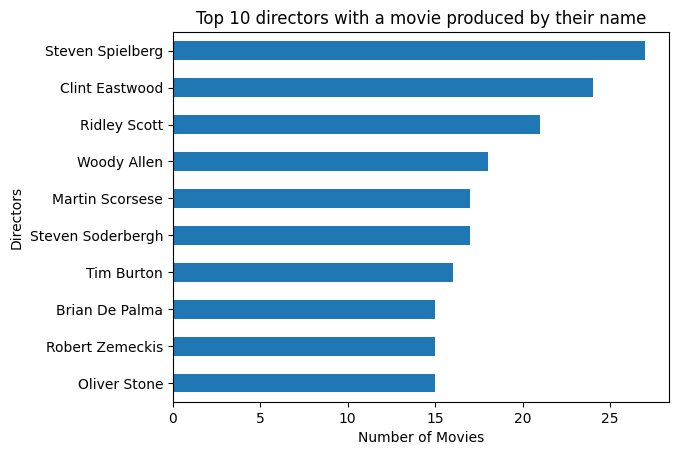

In [16]:
pd.options.display.float_format = '{:.0f}'.format #displays budget as whole number
top_directors = df['director'] #new df for budget and year
top_directors_count = top_directors.value_counts(ascending=False).head(10)
print(top_directors_count)
top_directors_count.plot(x="original_title", y="runtime", kind= "barh").invert_yaxis()
plt.title("Top 10 directors with a movie produced by their name",fontsize = 12)
plt.xlabel('Number of Movies',fontsize = 10)
plt.ylabel('Directors',fontsize = 10)


### Research Question 8  (What're the factors affecting profits)


In [17]:
def find_corr(df,x,y) : #a function that calculates the correlation between two columns
    corr = df[x].corr(df[y])
    print ("Correlation between ", x, " and ", y, "is: ", round(corr, 2))

In [18]:
find_corr(df,"profit_adj","runtime") #using the correlation function created earlier to find correlations between profits and other factors
find_corr(df,"profit_adj","vote_average")
find_corr(df,"profit_adj","budget_adj")
find_corr(df,"profit_adj","popularity")

Correlation between  profit_adj  and  runtime is:  0.24
Correlation between  profit_adj  and  vote_average is:  0.29
Correlation between  profit_adj  and  budget_adj is:  0.4
Correlation between  profit_adj  and  popularity is:  0.52


Text(0.5, 1.0, 'Profit and popularity')

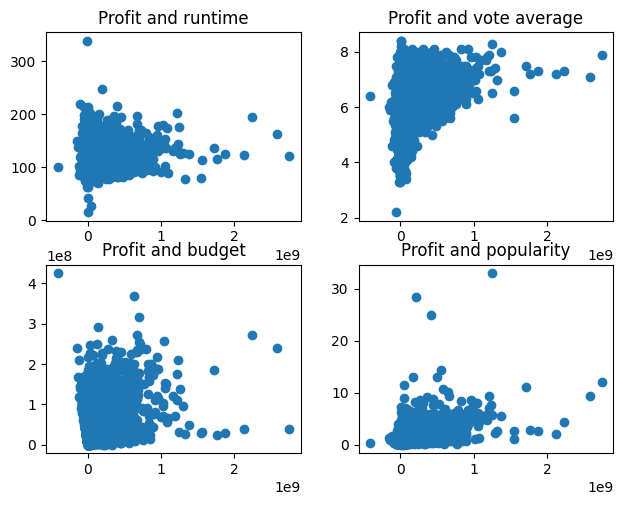

In [19]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout()
ax[0,0].scatter(df["profit_adj"], df["runtime"]) #plotting different correlations on profit_adj
ax[0, 0].set_title("Profit and runtime")
ax[0,1].scatter(df["profit_adj"], df["vote_average"])
ax[0, 1].set_title("Profit and vote average")
ax[1,0].scatter(df["profit_adj"], df["budget_adj"])
ax[1, 0].set_title("Profit and budget")
ax[1,1].scatter(df["profit_adj"], df["popularity"])
ax[1, 1].set_title("Profit and popularity")

**Plot 1: profit_adj vs runtime**


- Correlation = **0.24** profits and runtime are not highly correlated


**Plot 2: profit_adj vs vote average**

- Correlation = **0.29** again it seems like the correlation between profits and vote average is weak

**Plot 3: profit_adj vs budget**

- Correlation = **0.4** This appears to be a higher correlation but still considered weak
but it would seem that the higher the budget you may get more profits to a certain degree but there is a clear indication that budget is not the only factor in increasing profits.

**Plot 4: profit_adj vs popularity**

- Correlation = **0.52** This appears to be the highest correlation we have it seems that most popular movies tend to get higher profits


# conclusions

- Most popular movie is jurassic world
- The warriors way has the highest budget of all movies
- 2011 has the most number of movie releases 199
- 2013 had the highest sum of movie budget total
- Star wars and avatar are the most profitable movies
- Carlos is longest movie by runtime
- Steven spielberg has the most amount of movies directed
- Profits and budget are slightly correlated
- popularity of the movies usually means more profits


# Limitations

- Budgets and revenues are profits are adjusted to inflation to the year 2010
because i wanted all stats to have the same baseline year to ensure that the information is not affected by inflation

- the budget and revenue columns adjusted had many missing values i dropped any row that had 0 or negative value which affected the entire data set
